# 1. Importamos dependencias

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.datasets import make_blobs
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, confusion_matrix, silhouette_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 2. Introducción

## 2.1. Aprendizaje no supervisado

El aprendizaje no supervisado es un tipo de aprendizaje automático que funciona con datos no etiquetados. Se denomina "no supervisado" porque no se le brinda etiquetas; el algoritmo aprende por sí solo la estructura inherente de los datos. El objetivo principal del aprendizaje no supervisado es descubrir patrones ocultos, correlaciones y otras ideas útiles en los datos que podrían no ser evidentes a primera vista [1].

El aprendizaje no supervisado se utiliza habitualmente para la agrupación, la reducción de la dimensionalidad y la detección de anomalías. El clustering consiste en agrupar puntos de datos similares, la reducción dimensional simplifica los datos a un número manejable de características manteniendo su estructura, y la detección de anomalías identifica puntos de datos inusuales que difieren significativamente del resto [2].

## 2.2. Algoritmo Mean-Shift

El algoritmo Mean-Shift es una técnica de aprendizaje no supervisado que se utiliza principalmente para tareas de agrupación y procesamiento de imágenes. Funciona colocando una ventana alrededor de los puntos de datos y calculando la media de los datos dentro de esa ventana. A continuación, la ventana se desplaza hacia la media y el proceso se repite hasta la convergencia [3].

Una de las principales características del algoritmo Mean-Shift es que no requiere un conocimiento previo del número de conglomerados, a diferencia de otros algoritmos de agrupación como K-means. Es un algoritmo no paramétrico, lo que significa que no hace suposiciones sobre la distribución de datos subyacente [4].

El algoritmo Mean-Shift es especialmente eficaz cuando se trata de conjuntos de datos complejos y multimodales en los que los algoritmos de agrupación tradicionales pueden tener dificultades [3]. Su capacidad para descubrir y adaptarse a la estructura inherente de los datos lo convierte en una valiosa herramienta en el campo del aprendizaje no supervisado. A continuación un pequeño ejemplo de su uso.

Number of clusters detected by the algorithm: 5
Cluster centers detected at:
[[-0.19544286 -0.11289937]
 [ 0.21077564 -1.19811231]
 [ 1.21098307  0.40831673]
 [ 0.12747682  2.45795563]
 [-2.6197451   0.8219025 ]]


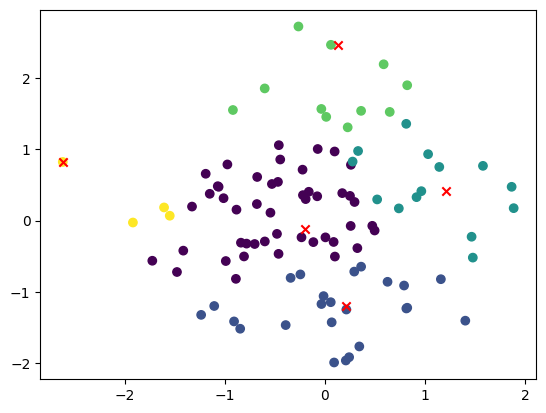

In [2]:
np.random.seed(42)
data = np.random.randn(100, 2)

ms = MeanShift(bandwidth=0.8)
ms.fit(data)

cluster_centers = ms.cluster_centers_
labels = ms.labels_

print(f"Number of clusters detected by the algorithm: {len(cluster_centers)}")
print(f"Cluster centers detected at:\n{cluster_centers}")

plt.figure()
plt.scatter(data[:,0], data[:,1], c=labels)
plt.scatter(cluster_centers[:,0], cluster_centers[:,1], marker='x', color='red')
plt.show()


Number of estimated clusters: 3


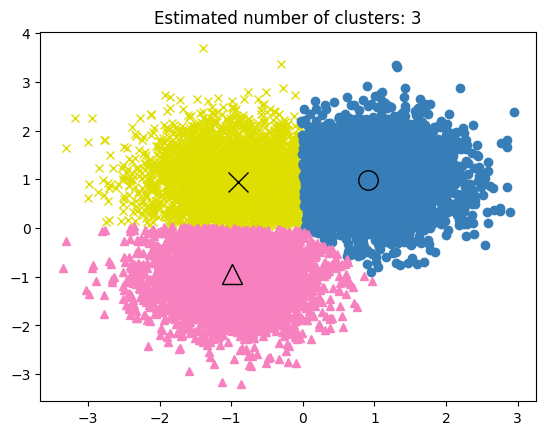

In [3]:
centers = [[1, 1], [-1, -1], [-1, 1]]
X, _ = make_blobs(n_samples=10000, centers=centers, cluster_std=0.6, random_state=42)

bandwidth = estimate_bandwidth(X, quantile=0.2, n_samples=500, random_state=42)
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X)

labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print(f"Number of estimated clusters: {n_clusters_}")

plt.figure()
plt.clf()

colors = ["#dede00", "#377eb8", "#f781bf"]
markers = ["x", "o", "^"]

for k, col in zip(range(n_clusters_), colors):
    my_members = labels == k
    cluster_center = cluster_centers[k]
    plt.plot(X[my_members, 0], X[my_members, 1], markers[k], color=col)
    plt.plot(
        cluster_center[0],
        cluster_center[1],
        markers[k],
        markerfacecolor=col,
        markeredgecolor="k",
        markersize=14
    )

plt.title(f"Estimated number of clusters: {n_clusters_}")
plt.show()

# 3. Cargamos el dataset

El [dataset HVC](https://archive.ics.uci.edu/ml/datasets/HCV+data#) es una colección de valores de laboratorio de donantes de sangre y pacientes con hepatitis C, junto con valores demográficos como la edad. El dataset es multivariante y contiene 615 instancias y 14 atributos. Los atributos incluyen valores enteros y reales.

El atributo objetivo para la clasificación en este conjunto de datos es "Categoría", que distingue entre donantes de sangre y pacientes con hepatitis C, incluido el progreso de la enfermedad ("sólo" hepatitis C, fibrosis, cirrosis).

Los atributos del conjunto de datos son los siguientes:
- Category (diagnóstico) (valores: '0=Donante de sangre', '0s=sospechoso de donante de sangre', '1=Hepatitis', '2=Fibrosis', '3=Cirrosis')
- Age (en años)
- Sex (f, m)
- ALB
- ALP
- ALT
- AST
- BIL
- CHE
- CHOL
- CREA
- GGT
- PROT

In [4]:
df = pd.read_csv("hcvdat0.csv", index_col=0)
df.head()

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 615 entries, 1 to 615
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Category  615 non-null    object 
 1   Age       615 non-null    int64  
 2   Sex       615 non-null    object 
 3   ALB       614 non-null    float64
 4   ALP       597 non-null    float64
 5   ALT       614 non-null    float64
 6   AST       615 non-null    float64
 7   BIL       615 non-null    float64
 8   CHE       615 non-null    float64
 9   CHOL      605 non-null    float64
 10  CREA      615 non-null    float64
 11  GGT       615 non-null    float64
 12  PROT      614 non-null    float64
dtypes: float64(10), int64(1), object(2)
memory usage: 67.3+ KB


# 4. Pre-procesamiento

## 4.1. Valores faltantes

<Axes: >

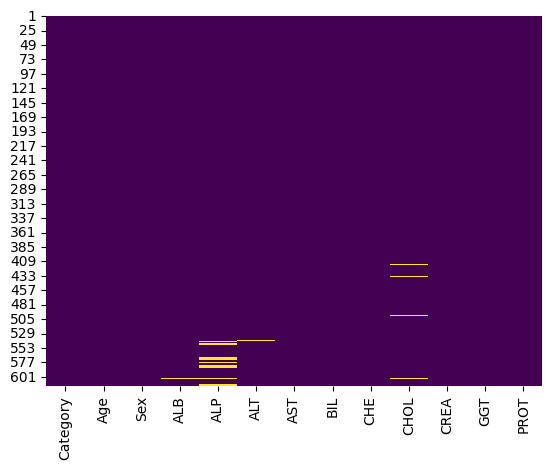

In [6]:
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")

Vemos que la cantidad de datos faltantes es pequeña, por lo que directamente eliminamos las muestras con valores faltantes.

In [7]:
df.dropna(axis=0, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 589 entries, 1 to 613
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Category  589 non-null    object 
 1   Age       589 non-null    int64  
 2   Sex       589 non-null    object 
 3   ALB       589 non-null    float64
 4   ALP       589 non-null    float64
 5   ALT       589 non-null    float64
 6   AST       589 non-null    float64
 7   BIL       589 non-null    float64
 8   CHE       589 non-null    float64
 9   CHOL      589 non-null    float64
 10  CREA      589 non-null    float64
 11  GGT       589 non-null    float64
 12  PROT      589 non-null    float64
dtypes: float64(10), int64(1), object(2)
memory usage: 64.4+ KB


Eliminamos la variable de sospechoso donante de sangre pues no se sabe específicamente su uso.

In [8]:
df = df[df.iloc[:, 0] != "0s=suspect Blood Donor"]

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 582 entries, 1 to 613
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Category  582 non-null    object 
 1   Age       582 non-null    int64  
 2   Sex       582 non-null    object 
 3   ALB       582 non-null    float64
 4   ALP       582 non-null    float64
 5   ALT       582 non-null    float64
 6   AST       582 non-null    float64
 7   BIL       582 non-null    float64
 8   CHE       582 non-null    float64
 9   CHOL      582 non-null    float64
 10  CREA      582 non-null    float64
 11  GGT       582 non-null    float64
 12  PROT      582 non-null    float64
dtypes: float64(10), int64(1), object(2)
memory usage: 63.7+ KB


## 4.2. Binarización de sexo

In [10]:
df.replace(["m", "f"], [0, 1], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 582 entries, 1 to 613
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Category  582 non-null    object 
 1   Age       582 non-null    int64  
 2   Sex       582 non-null    int64  
 3   ALB       582 non-null    float64
 4   ALP       582 non-null    float64
 5   ALT       582 non-null    float64
 6   AST       582 non-null    float64
 7   BIL       582 non-null    float64
 8   CHE       582 non-null    float64
 9   CHOL      582 non-null    float64
 10  CREA      582 non-null    float64
 11  GGT       582 non-null    float64
 12  PROT      582 non-null    float64
dtypes: float64(10), int64(2), object(1)
memory usage: 63.7+ KB


## 4.3. Separación en dataset y etiquetas

In [11]:
X = df.drop(["Category"], axis=1)
y = df[["Category"]]
X.shape, y.shape

((582, 12), (582, 1))

In [12]:
y.value_counts()

Category     
0=Blood Donor    526
3=Cirrhosis       24
1=Hepatitis       20
2=Fibrosis        12
dtype: int64

## 4.4. Pre-procesamiento de las etiquetas

Mantenemos el primer dígito de cada categoría para tener valores numéricos como etiquetas.

In [13]:
pattern = r"(\d)"
y["Category"] = y["Category"].str.extract(pattern)
print(y)

    Category
1          0
2          0
3          0
4          0
5          0
..       ...
609        3
610        3
611        3
612        3
613        3

[582 rows x 1 columns]


C:\Users\eavil\AppData\Local\Temp\ipykernel_10912\1046713589.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y["Category"] = y["Category"].str.extract(pattern)


In [14]:
y = y.apply(pd.to_numeric)
y.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 582 entries, 1 to 613
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Category  582 non-null    int64
dtypes: int64(1)
memory usage: 9.1 KB


In [15]:
y.value_counts()

Category
0           526
3            24
1            20
2            12
dtype: int64

## 4.5. Escalado

Se utilizará StandardScaler por descarte, puesto que el MinMaxScaler es muy susceptible a outliers y RobustScaler se usa principalmente cuando el dataset cuenta con muchos outliers, sin embargo este dataset, a pesar de que cuenta con outliers como veremos más adelante, no son en gran cantidad y por lo general pueden ser valores asociados a la cantidad de muestras que tiene cada clase, al ser pocas muestras en comparación con la clase de pacientes sanos, el escalador puede confundir los valores con outliers.

In [16]:
ss = StandardScaler()
X_scaled = ss.fit_transform(X)
X_scaled.shape

(582, 12)

## 4.6. Reducción de dimensionalidad

Verificamos el número de componentes mínimos para una varianza explicada del 95%.

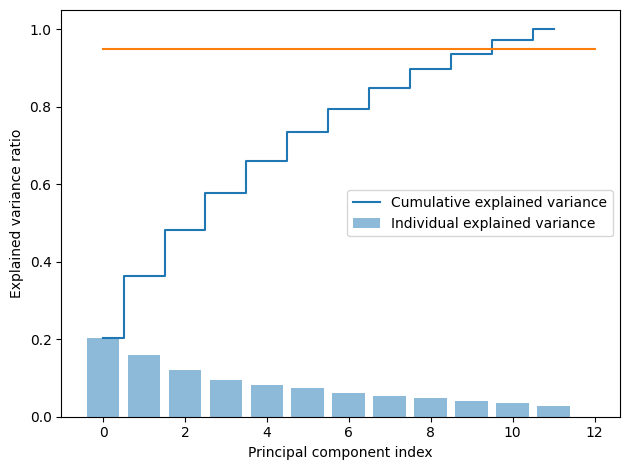

In [17]:
pca = PCA()
X_pca = pca.fit_transform(X_scaled)
exp_var_pca = pca.explained_variance_ratio_
cum_sum_eigenvalues = np.cumsum(exp_var_pca)
plt.bar(range(0, len(exp_var_pca)), exp_var_pca, alpha=0.5, align="center", label="Individual explained variance")
plt.step(range(0, len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where="mid", label="Cumulative explained variance")
plt.plot([0, 12], [0.95, 0.95])
plt.ylabel("Explained variance ratio")
plt.xlabel("Principal component index")
plt.legend(loc="best")
plt.tight_layout()
plt.show()

Basta con 6 componentes para reducir la dimensionalidad del dataset. Sin embargo, para analizar el clustering the este dataset, utilizaremos únicamente 2 y 3 componentes para que puedan ser visualizados en una gráfica.

In [18]:
pca1 = PCA(n_components=2, random_state=42)
X2 = pca1.fit_transform(X_scaled)
pca2 = PCA(n_components=3, random_state=42)
X3 = pca2.fit_transform(X_scaled)
X2.shape, X3.shape

((582, 2), (582, 3))

In [19]:
np.cumsum(pca1.explained_variance_ratio_)[-1]

0.3639607929054239

In [20]:
np.cumsum(pca2.explained_variance_ratio_)[-1]

0.48332197229396656

In [21]:
X1 = pd.DataFrame(X_scaled, columns=X.columns)

In [22]:
X2 = pd.DataFrame(X2, columns=[
    "component1",
    "component2"
])
X2.shape

(582, 2)

In [23]:
X3 = pd.DataFrame(X3, columns=[
    "component1",
    "component2",
    "component3"
])
X3.shape

(582, 3)

# 5. Análisis Exploratorio de Datos

Veamos la descripción de la data ya estandarizada.

In [24]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,582.0,47.295533,9.863890,23.00,39.000,47.000,54.0000,77.00
Sex,582.0,0.386598,0.487389,0.00,0.000,0.000,1.0000,1.00
ALB,582.0,41.831443,5.369272,23.00,39.000,41.950,45.1750,82.20
ALP,582.0,67.651890,25.148941,11.30,52.500,66.000,79.3000,416.60
ALT,582.0,25.666838,14.920906,0.90,16.325,22.500,31.7500,118.10
AST,582.0,33.325086,32.357234,12.00,21.425,25.600,31.6000,324.00
BIL,582.0,11.094330,17.494290,1.80,5.300,7.150,11.0000,209.00
CHE,582.0,8.212337,2.151660,1.42,6.950,8.265,9.5650,16.41
CHOL,582.0,5.402646,1.114920,1.43,4.630,5.310,6.0875,9.67
CREA,582.0,81.909107,50.669976,8.00,68.000,77.000,89.0000,1079.10


Distribución de sexo.

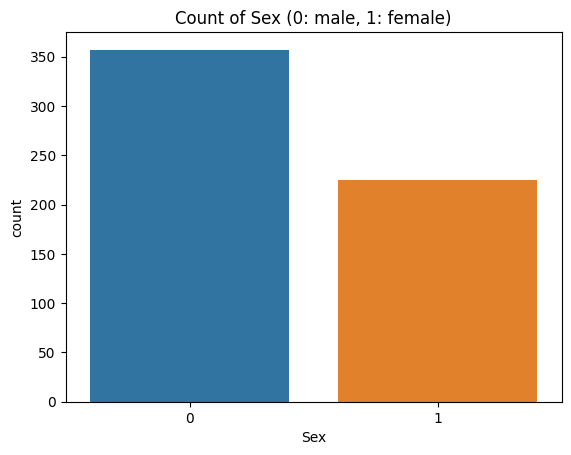

In [25]:
sns.countplot(x="Sex", data=X)
plt.title("Count of Sex (0: male, 1: female)")
plt.show()

Distribución de variables numéricas.

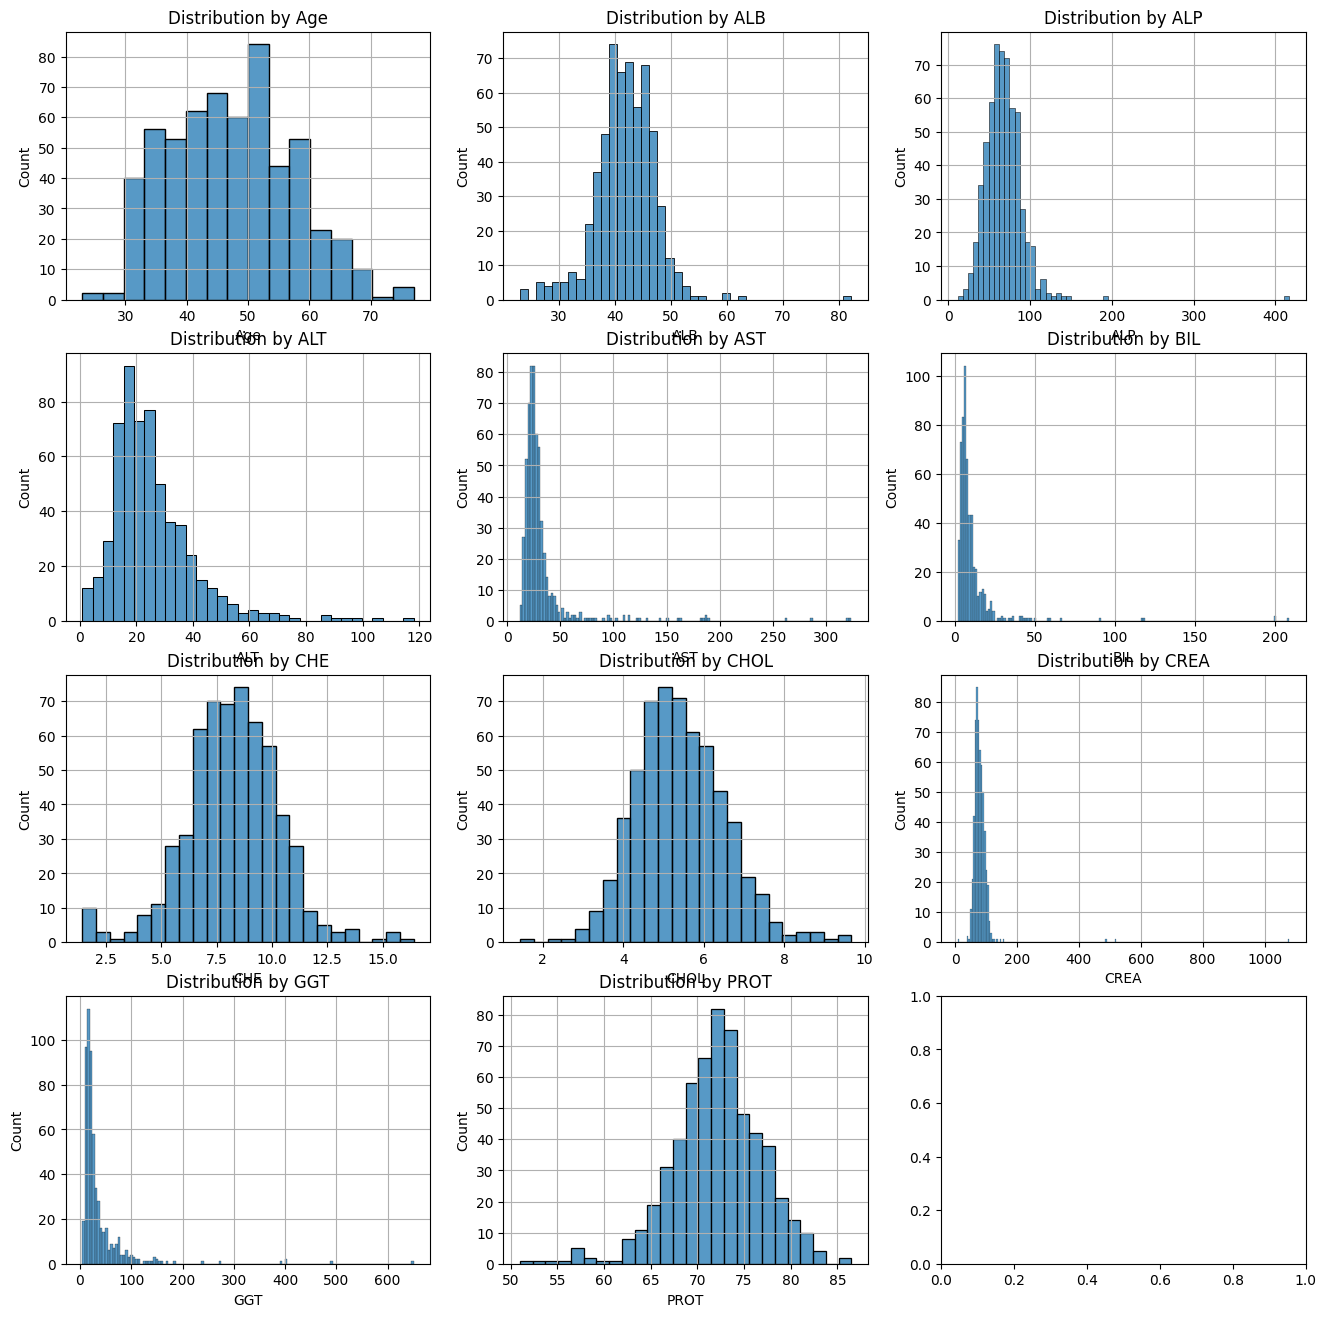

In [26]:
fig, ax = plt.subplots(4, 3, figsize=(16, 16))
sns.histplot(x="Age", data=X, ax=ax[0, 0])
sns.histplot(x="ALB", data=X, ax=ax[0, 1])
sns.histplot(x="ALP", data=X, ax=ax[0, 2])
sns.histplot(x="ALT", data=X, ax=ax[1, 0])
sns.histplot(x="AST", data=X, ax=ax[1, 1])
sns.histplot(x="BIL", data=X, ax=ax[1, 2])
sns.histplot(x="CHE", data=X, ax=ax[2, 0])
sns.histplot(x="CHOL", data=X, ax=ax[2, 1])
sns.histplot(x="CREA", data=X, ax=ax[2, 2])
sns.histplot(x="GGT", data=X, ax=ax[3, 0])
sns.histplot(x="PROT", data=X, ax=ax[3, 1])
ax[0, 0].set_title("Distribution by Age")
ax[0, 0].grid(True)
ax[0, 1].set_title("Distribution by ALB")
ax[0, 1].grid(True)
ax[0, 2].set_title("Distribution by ALP")
ax[0, 2].grid(True)
ax[1, 0].set_title("Distribution by ALT")
ax[1, 0].grid(True)
ax[1, 1].set_title("Distribution by AST")
ax[1, 1].grid(True)
ax[1, 2].set_title("Distribution by BIL")
ax[1, 2].grid(True)
ax[2, 0].set_title("Distribution by CHE")
ax[2, 0].grid(True)
ax[2, 1].set_title("Distribution by CHOL")
ax[2, 1].grid(True)
ax[2, 2].set_title("Distribution by CREA")
ax[2, 2].grid(True)
ax[3, 0].set_title("Distribution by GGT")
ax[3, 0].grid(True)
ax[3, 1].set_title("Distribution by PROT")
ax[3, 1].grid(True)
plt.show()

Observemos la distribución de etiquetas con los dos principales componentes hallados.

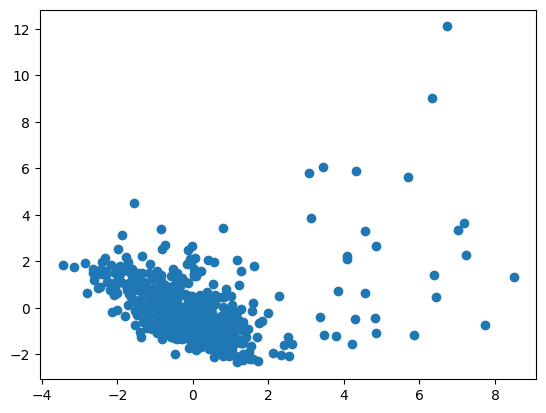

In [27]:
fig = plt.figure()
ax = fig.add_subplot(111)
X2 = X2.to_numpy()
ax.scatter(X2[:, 0], X2[:, 1])
plt.show()

In [28]:
y["Category"].unique()

array([0, 1, 2, 3], dtype=int64)

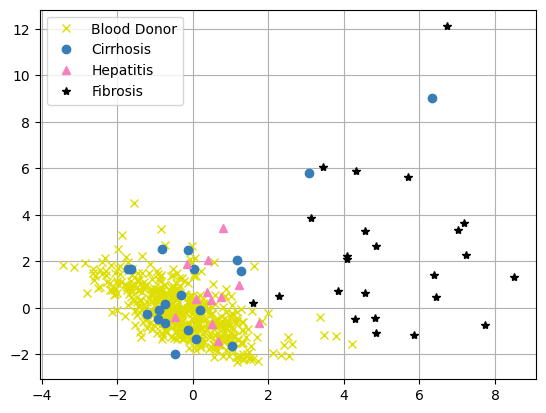

In [29]:
fig = plt.figure()
ax = fig.add_subplot(111)
colors = ["#dede00", "#377eb8", "#f781bf", "#000000"]
markers = ["x", "o", "^", "*"]
for k, col in zip(range(len(y["Category"].unique())), colors):
    my_members = y["Category"] == k
    ax.plot(X2[my_members, 0], X2[my_members, 1], markers[k], color=col)
plt.grid(True)
plt.legend(["Blood Donor", "Cirrhosis", "Hepatitis", "Fibrosis"])
plt.show()

Observemos la distribución de etiquetas con los tres principales componentes hallados.

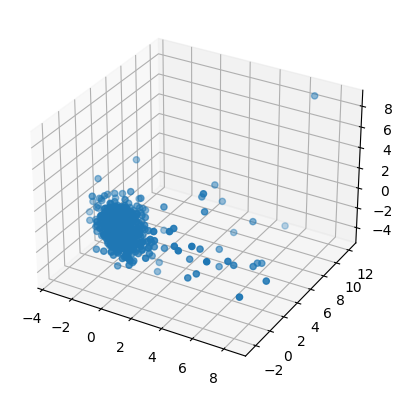

In [30]:
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
X3 = X3.to_numpy()
ax.scatter(X3[:, 0], X3[:, 1], X3[:, 2])
plt.show()

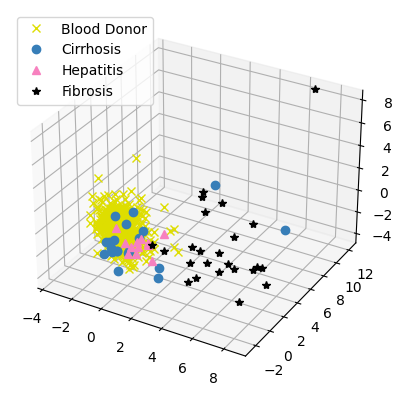

In [31]:
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
colors = ["#dede00", "#377eb8", "#f781bf", "#000000"]
markers = ["x", "o", "^", "*"]
for k, col in zip(range(len(y["Category"].unique())), colors):
    my_members = y["Category"] == k
    ax.plot(X3[my_members, 0], X3[my_members, 1], X3[my_members, 2], markers[k], color=col)
plt.grid(True)
plt.legend(["Blood Donor", "Cirrhosis", "Hepatitis", "Fibrosis"])
plt.show()

Por las características de las etiquetas, no parece ser una buena solución el uso de Mean-Shift para la clasificación múltiple de los casos descritos en el dataset. No obstante, este método podría utilizarse para distinguir a los pacientes sanos de los pacientes con fibrosis. Es así que primero utilizaremos el método de clustering primero para definir grupos entre las variables demográficas y las variables de laboratorio, y luego para evaluar la precisión del modelo para distinguir entre persona sana y persona con fibrosis.

# 6. Entrenamiento del modelo

## 6.1. Clustering de grupos de interés demográficos

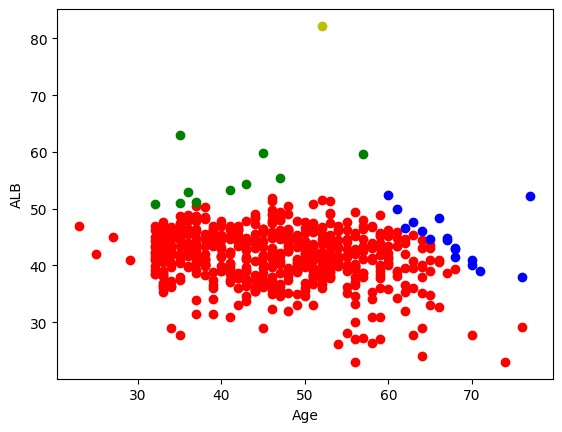

In [32]:
# Seleccionamos columnas de edad y albúmina
X_new = X1[["Age", "ALB"]]
X_show = X[["Age", "ALB"]]

# Entrenamos el modelo Mean-Shift
ms = MeanShift(bandwidth=estimate_bandwidth(X_new, random_state=42))
ms.fit(X_new)

# Obtenemos los clusters y sus centros
labels = ms.labels_
centroids = ms.cluster_centers_

# Resultados
colors = ["r", "g", "b", "y", "m", "c", "k"]
fig = plt.figure()
ax = fig.add_subplot(111)
for i, centroid in enumerate(centroids):
    ax.scatter(X_show[labels==i]["Age"], X_show[labels==i]["ALB"], color=colors[i%len(colors)])
ax.set_xlabel("Age")
ax.set_ylabel("ALB")
plt.show()

En la gráfica obtenida se distinguen 3 grupos, un grupo de pacientes con niveles normales de albúmina en todo el rango de edad; un grupo que va desde los 30 a 60 años con niveles altos de albúmina; y un grupo de personas con una edad muy avanzada (más de 60 años) que cuentan con niveles de albúmina entre niveles normales y altos. Así mismo, recalcar que se tiene un outlier.

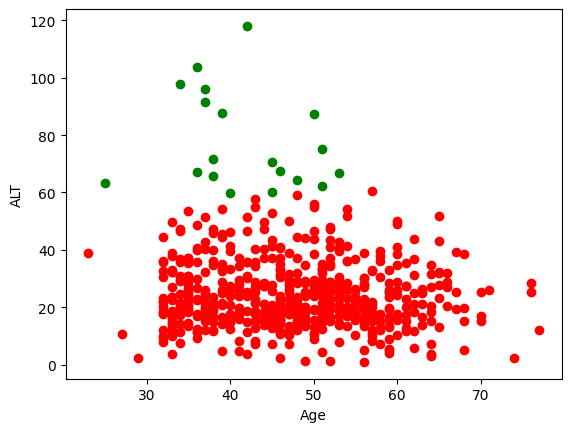

In [33]:
# Seleccionamos columnas de edad y albúmina
X_new = X1[["Age", "ALT"]]
X_show = X[["Age", "ALT"]]

# Entrenamos el modelo Mean-Shift
ms = MeanShift(bandwidth=estimate_bandwidth(X_new, random_state=42))
ms.fit(X_new)

# Obtenemos los clusters y sus centros
labels = ms.labels_
centroids = ms.cluster_centers_

# Resultados
colors = ["r", "g", "b", "y", "m", "c", "k"]
fig = plt.figure()
ax = fig.add_subplot(111)
for i, centroid in enumerate(centroids):
    ax.scatter(X_show[labels==i]["Age"], X_show[labels==i]["ALT"], color=colors[i%len(colors)])
ax.set_xlabel("Age")
ax.set_ylabel("ALT")
plt.show()

Al igual que en el caso anterior, se puede notar que se tiene niveles normales de alanina aminotransferasa (ALB) durante todo el rango de edad. También se puede notar un grupo en el rango de 20 a 55 años con valores altos de ALB.

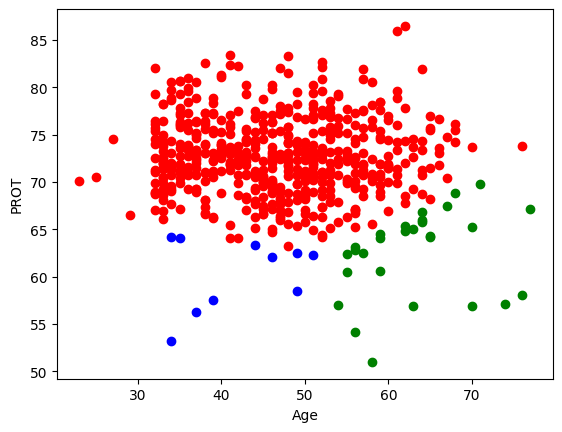

In [34]:
# Seleccionamos columnas de edad y albúmina
X_new = X1[["Age", "PROT"]]
X_show = X[["Age", "PROT"]]

# Entrenamos el modelo Mean-Shift
ms = MeanShift(bandwidth=estimate_bandwidth(X_new, random_state=42))
ms.fit(X_new)

# Obtenemos los clusters y sus centros
labels = ms.labels_
centroids = ms.cluster_centers_

# Resultados
colors = ["r", "g", "b", "y", "m", "c", "k"]
fig = plt.figure()
ax = fig.add_subplot(111)
for i, centroid in enumerate(centroids):
    ax.scatter(X_show[labels==i]["Age"], X_show[labels==i]["PROT"], color=colors[i%len(colors)])
ax.set_xlabel("Age")
ax.set_ylabel("PROT")
plt.show()

En esta gráfica se aprecia que durante todo el rango de edad el total de proteínas es bastante alto. También hay otros dos grupos definidos por adultos de entre 30 y 50 años con niveles bajos de proteína y adultos de entre 50 y 80 años con niveles bajos de proteína.

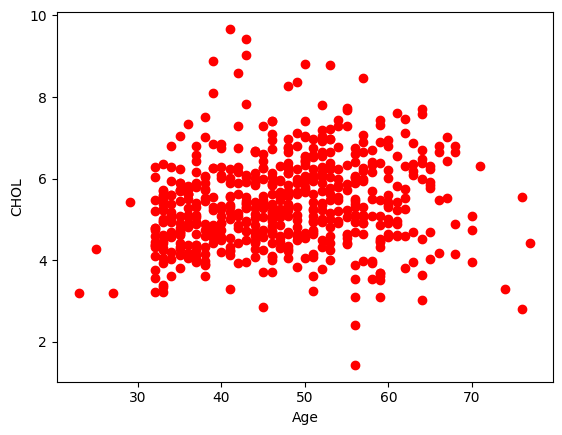

In [35]:
# Seleccionamos columnas de edad y albúmina
X_new = X1[["Age", "CHOL"]]
X_show = X[["Age", "CHOL"]]

# Entrenamos el modelo Mean-Shift
ms = MeanShift(bandwidth=estimate_bandwidth(X_new, random_state=42))
ms.fit(X_new)

# Obtenemos los clusters y sus centros
labels = ms.labels_
centroids = ms.cluster_centers_

# Resultados
colors = ["r", "g", "b", "y", "m", "c", "k"]
fig = plt.figure()
ax = fig.add_subplot(111)
for i, centroid in enumerate(centroids):
    ax.scatter(X_show[labels==i]["Age"], X_show[labels==i]["CHOL"], color=colors[i%len(colors)])
ax.set_xlabel("Age")
ax.set_ylabel("CHOL")
plt.show()

En este caso el modelo no consiguió distinguir grupos significativamente distintos, esto no es un resultado correcto según lo que se sabe de la relación de los niveles de colesterol y las enfermedades hepáticas.

## 6.2. Clustering de relación entre variables

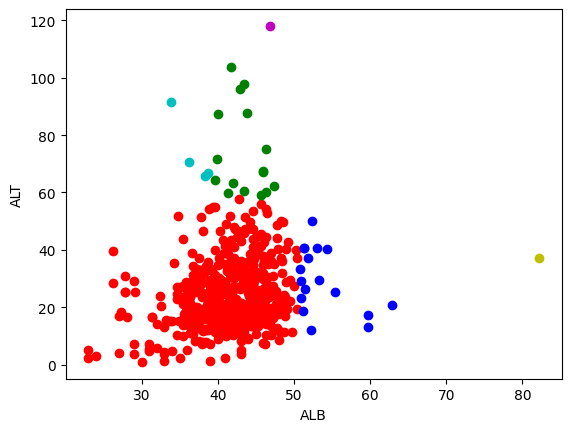

In [36]:
# Seleccionamos columnas de edad y albúmina
X_new = X1[["ALB", "ALT"]]
X_show = X[["ALB", "ALT"]]

# Entrenamos el modelo Mean-Shift
ms = MeanShift(bandwidth=estimate_bandwidth(X_new, random_state=42))
ms.fit(X_new)

# Obtenemos los clusters y sus centros
labels = ms.labels_
centroids = ms.cluster_centers_

# Resultados
colors = ["r", "g", "b", "y", "m", "c", "k"]
fig = plt.figure()
ax = fig.add_subplot(111)
for i, centroid in enumerate(centroids):
    ax.scatter(X_show[labels==i]["ALB"], X_show[labels==i]["ALT"], color=colors[i%len(colors)])
ax.set_xlabel("ALB")
ax.set_ylabel("ALT")
plt.show()

Se evidencia un grupo claro en el que las personas tienen un nivel bajo de ALB y ALT, el cual corresponde a los pacientes sanos. Por otro lado, hay otros dos grupos con una cantidad significativa de muestras, estos son:

- Aquellos que tienen niveles altos de ALB y niveles normales de ALT
- Aquellos que tienen niveles normales de ALB y niveles altos de ALT

Los otros tres grupos de colores celeste, rosado y amarillo parecen ser outliers por la poca cantidad de muestras que representan. Por un lado porque tienen una cantidad muy elevada de ALT, otro porque tiene una cantidad muy elevada de ALB y otro grupo que no parece ser correctamente encontrado ya que parece ser parte del grupo verde.

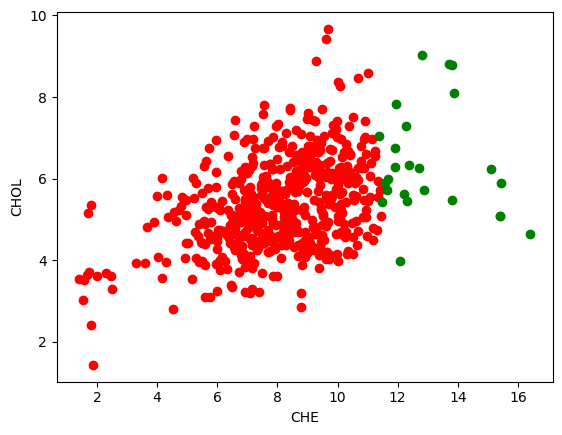

In [37]:
# Seleccionamos columnas de edad y albúmina
X_new = X1[["CHE", "CHOL"]]
X_show = X[["CHE", "CHOL"]]

# Entrenamos el modelo Mean-Shift
ms = MeanShift(bandwidth=estimate_bandwidth(X_new, random_state=42))
ms.fit(X_new)

# Obtenemos los clusters y sus centros
labels = ms.labels_
centroids = ms.cluster_centers_

# Resultados
colors = ["r", "g", "b", "y", "m", "c", "k"]
fig = plt.figure()
ax = fig.add_subplot(111)
for i, centroid in enumerate(centroids):
    ax.scatter(X_show[labels==i]["CHE"], X_show[labels==i]["CHOL"], color=colors[i%len(colors)])
ax.set_xlabel("CHE")
ax.set_ylabel("CHOL")
plt.show()

El modelo generó dos grupos muy marcados los cuales son los que tienen un nivel bajo de colinesterasa y un grupo con niveles altos de colinesterasa. Parece que el modelo no encuentra diferencias significativas entre los valores de colesterol pues los grupos los definió a partir de los valores de colinesterasa.

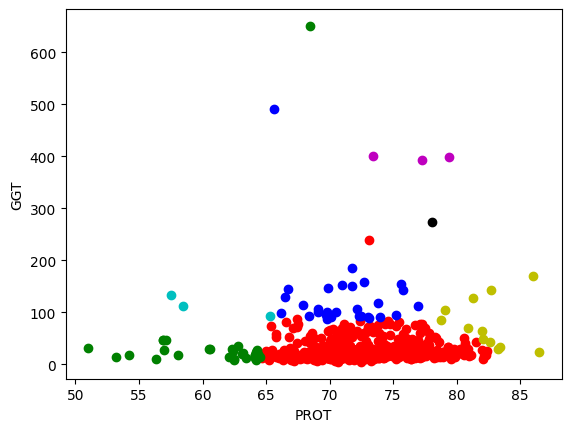

In [38]:
# Seleccionamos columnas de edad y albúmina
X_new = X1[["PROT", "GGT"]]
X_show = X[["PROT", "GGT"]]

# Entrenamos el modelo Mean-Shift
ms = MeanShift(bandwidth=estimate_bandwidth(X_new, random_state=42))
ms.fit(X_new)

# Obtenemos los clusters y sus centros
labels = ms.labels_
centroids = ms.cluster_centers_

# Resultados
colors = ["r", "g", "b", "y", "m", "c", "k"]
fig = plt.figure()
ax = fig.add_subplot(111)
for i, centroid in enumerate(centroids):
    ax.scatter(X_show[labels==i]["PROT"], X_show[labels==i]["GGT"], color=colors[i%len(colors)])
ax.set_xlabel("PROT")
ax.set_ylabel("GGT")
plt.show()

El grupo principal que se observa en la relación de gamma-glutamil transferasa (GGT) con los niveles de proteínas es el de niveles altos de proteína y niveles bajos de GGT, también se ven otros tres grupos significativos como lo son los niveles bajos de proteína y niveles bajos de GGT; niveles muy altos de proteína y niveles ligeramente superiores a la media en GGT; y niveles altos de proteína y niveles ligeramente superiores a la media en GGT. Por otro lado, los grupos celeste, rojo (grupo unitario) y negro parecen ser grupos que forman parte de uno de los grupos ya mencionados (por lo que sería un error del modelo); mientras que los grupos rosado, azul (grupo unitario) y verde (grupo unitario) tienen comportamiento de outliers.

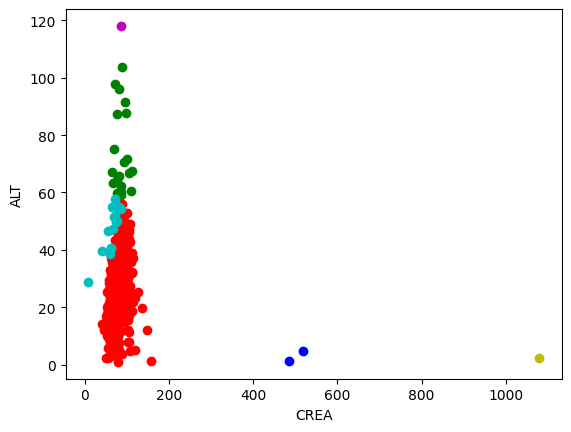

In [39]:
# Seleccionamos columnas de edad y albúmina
X_new = X1[["CREA", "ALT"]]
X_show = X[["CREA", "ALT"]]

# Entrenamos el modelo Mean-Shift
ms = MeanShift(bandwidth=estimate_bandwidth(X_new, random_state=42))
ms.fit(X_new)

# Obtenemos los clusters y sus centros
labels = ms.labels_
centroids = ms.cluster_centers_

# Resultados
colors = ["r", "g", "b", "y", "m", "c", "k"]
fig = plt.figure()
ax = fig.add_subplot(111)
for i, centroid in enumerate(centroids):
    ax.scatter(X_show[labels==i]["CREA"], X_show[labels==i]["ALT"], color=colors[i%len(colors)])
ax.set_xlabel("CREA")
ax.set_ylabel("ALT")
plt.show()

En este caso el modelo identifica dos grupos principales, niveles de creatina bajos con niveles de ALT bajos, y niveles de creatina bajos con niveles altos de ALT. Por otro lado, el grupo celeste parece que debería fusionarse con el grupo rojo. Finalmente, los grupos rosado, azul y amarillo tienen comportamiento de outliers por la poca cantidad de muestras.

## 6.3. Clustering para clasificación

In [40]:
mask = (y["Category"] != 1) & (y["Category"] != 2)
new_y = y[mask]
new_y = new_y//3
new_X_scaled = X2[mask]
new_y.shape, new_X_scaled.shape

((550, 1), (550, 2))

In [41]:
X_train, X_test, y_train, y_test = train_test_split(new_X_scaled, new_y, test_size=0.2, stratify=new_y, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((440, 2), (110, 2), (440, 1), (110, 1))

In [42]:
ms = MeanShift(bandwidth=estimate_bandwidth(X_train, random_state=42, quantile=0.9))
ms.fit(X_train)
preds = ms.predict(X_test)
print(accuracy_score(y_test, preds))

0.990909090909091


In [43]:
# Obtenemos los clusters y sus centros
labels = ms.labels_
centroids = ms.cluster_centers_
np.unique(labels)

array([0, 1, 2], dtype=int64)

In [44]:
np.unique(centroids)

array([-0.27187568, -0.15798406,  3.33296327,  5.04613443,  6.72997987,
       12.10146155])

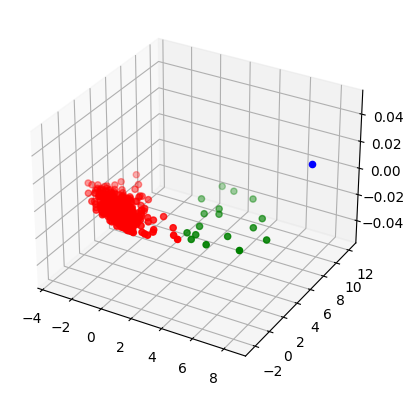

In [45]:
# Resultados
colors = ["r", "g", "b", "y", "m", "c", "k"]
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
for i, centroid in enumerate(centroids):
    ax.scatter(X_train[labels==i, 0], X_train[labels==i, 1], color=colors[i%len(colors)])
plt.show()

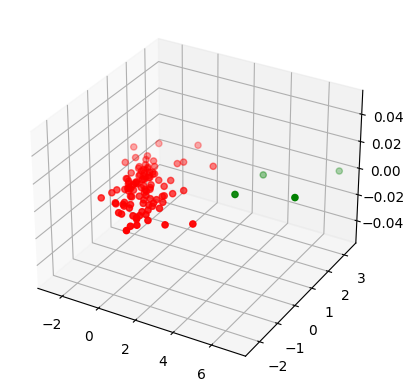

In [46]:
# Resultados
colors = ["r", "g", "b", "y", "m", "c", "k"]
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
for i, centroid in enumerate(centroids):
    ax.scatter(X_test[preds==i, 0], X_test[preds==i, 1], color=colors[i%len(colors)])
plt.show()

# 7. Métricas

El modelo obtuvo una precisión del 99.1%

In [47]:
print(accuracy_score(y_test, preds))

0.990909090909091


No obstante, esto se puede deber en gran parte al desbalance de datos entre la clase de personas sanas y personas con fibrosis hepática.

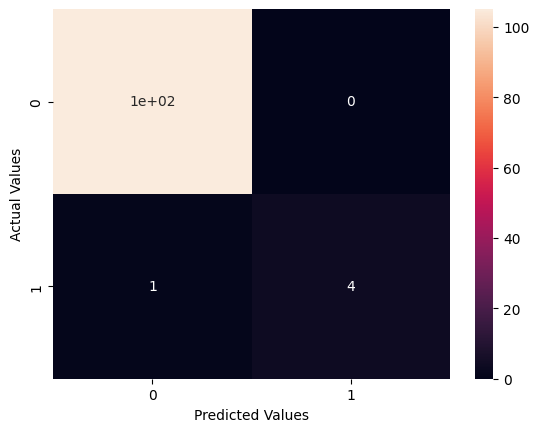

In [48]:
cm = confusion_matrix(y_test, preds)
fig = plt.figure()
sns.heatmap(cm, annot=True)
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()

La puntuación silhouette indica que los clusters obtenidos son relativamente buenos pues el coeficiente es cercano a 1, de forma que los clusters tienen una superposición leve.

In [49]:
silhouette_score(X_train, labels)

0.7004911848516869

A pesar de que reconoce 3 etiquetas dentro del dataset brindado, el grupo de color azul parece ser un outlier, pues en el set de testeo no se confunde con este grupo a la hora de predecir la clase.

# 8. Conclusiones

A partir de los resultados obtenidos en el clustering para la identificación de grupos representativos, observamos que, en la mayoría de casos, Mean Shift puede reconocer grupos sin mucho problema. Ya que no hubo un conocimiento previo del número de conglomerados, la aplicación del modelo Mean-Shift es ideal pues es especialmente efectivo para la agrupación de datos densos, es así que con otro tipo de modelos como KMeans no se podría obtener mejores resultados en la agrupación por grupo de interés, dado que necesitan que de antemano se sepa el número de clusters.

Por otro lado, al utilizar este método de clustering para diferenciar entre pacientes sanos y pacientes con fibrosis hepática, se obtuvo una precisión muy alta del 99.1%, sin embargo, esta precisión puede estar sujeta al gran desbalance de datos que existe entre la cantidad de pacientes sanos y los pacientes con fibrosis hepática. No obstante, según la matriz de confusión solo se ha equivocado en 1 valor, esto se puede deber a que es un caso que se encuentra entre el límite de ambos clusters, por lo que se entiende la confusión por parte del modelo. Sería adecuado investigar este comportamiento para una mayor cantidad de muestras de la clase de pacientes con fibrosis hepática. Es así que se podrían obtener mejores resultados para la clasificación de los datos utilizando un modelo distinto, ya que al saber la cantidad de grupos distintos, se podría utilizar otros métodos como KMeans o DBScan, esto es especialmente favorable para la clasificación múltiple, pues como mencionamos previamente, el modelo Mean-Shift no iba a conseguir buenos resultados utilizando hasta 3 componentes pues las clases se camuflaban con otras y por ello tuvimos que utilizar dos de las clases.

# 9. Referencias

[1] “¿Qué es el aprendizaje no supervisado? | IBM,” Ibm.com, 2023. https://www.ibm.com/es-es/topics/unsupervised-learning (accessed May 14, 2023).

[2] “¿Qué es el agrupamiento en clústeres?,” Google Developers, 2022. https://developers.google.com/machine-learning/clustering/overview?hl=es-419 (accessed May 14, 2023).

‌[3] Yufeng, “Understanding Mean Shift Clustering and Implementation with Python,” Medium, Feb. 22, 2022. https://towardsdatascience.com/understanding-mean-shift-clustering-and-implementation-with-python-6d5809a2ac40 (accessed May 14, 2023).

[4] “sklearn.cluster.MeanShift,” scikit-learn, 2023. https://scikit-learn.org/stable/modules/generated/sklearn.cluster.MeanShift.html (accessed May 14, 2023).